In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 16003, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 16003 (delta 21), reused 20 (delta 13), pack-reused 15967
Receiving objects: 100% (16003/16003), 14.66 MiB | 19.17 MiB/s, done.
Resolving deltas: 100% (10983/10983), done.


In [ ]:
%cd /content/yolov5/

/content/yolov5


In [ ]:
!pip install -qr requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00


In [ ]:
# 모듈 import
import torch
from IPython.display import Image, clear_output, display
from glob import glob
import numpy as np
import cv2
import random
import yaml

In [ ]:
%mkdir /content/yolov5/bic
%cd /content/yolov5/bic

/content/yolov5/bic


In [ ]:
!pip install gdown
!gdown --id 1Tzxs92Tk5wFqzrMIM18M2uyCrSy1zMuv --output /content/yolov5/bic/bic.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Tzxs92Tk5wFqzrMIM18M2uyCrSy1zMuv
To: /content/yolov5/bic/bic.zip
100% 798M/798M [00:08<00:00, 99.7MB/s]


In [ ]:
!unzip bic.zip
!rm bic.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/labels/IMG_CON_CRANE_DOOR_B_20210927071549_517094_jpg.rf.7ee27359cd9b7b770ab619c38a9f7e22.txt  
  inflating: train/labels/IMG_CON_CRANE_DOOR_B_20210927071755_717055_jpg.rf.847c95d98e4a98e50ec129f3f63f8f89.txt  
  inflating: train/labels/IMG_CON_CRANE_DOOR_B_20210927072256_227065_jpg.rf.be8666ee4d52bb0a90abd1ab18c91e4e.txt  
  inflating: train/labels/IMG_CON_CRANE_DOOR_B_20210927072508_527080_jpg.rf.4dd69d846eedf36120eedf1460979ca7.txt  
  inflating: train/labels/IMG_CON_CRANE_DOOR_B_20210927072649_627094_jpg.rf.45a334d10227ac527698dff35c631682.txt  
  inflating: train/labels/IMG_CON_CRANE_DOOR_B_20210927072922_927022_jpg.rf.aa6300a0992f5914e142a6fd237aabf6.txt  
  inflating: train/labels/IMG_CON_CRANE_DOOR_B_20210927073340_337004_jpg.rf.bc20ee2070b658ac31cc10f765781964.txt  
  inflating: train/labels/IMG_CON_CRANE_DOOR_B_20210927073649_637094_jpg.rf.6772b420b987bd707426d7abffbfee47.txt  
  inflating: train/labels/IMG_CON_CRANE_DOOR

# /content/yolov5/bic/train 밖으로 옮기고 실행하기

In [ ]:
import os

folder_path = "/content/train/labels"  # 해당 폴더 경로를 적절하게 변경하세요.

# 폴더 내 파일 목록 가져오기
file_list = os.listdir(folder_path)

# "FRONT"를 포함하는 파일 삭제
for file_name in file_list:
    if "DOOR" in file_name:
        file_path = os.path.join(folder_path, file_name)
        os.remove(file_path)
        print(f"{file_name} 파일을 삭제했습니다.")

print("작업이 완료되었습니다.")

IMG_CON_CRANE_DOOR_A_20210831062331_336013_jpg.rf.27475281327dae3661284a8d17536ec4.txt 파일을 삭제했습니다.
IMG_CON_CRANE_DOOR_B_20210926220031_002213_jpg.rf.118ed4d825fb33bdc0277b9bb46fa460.txt 파일을 삭제했습니다.
IMG_CON_CRANE_DOOR_A_20210829094451_549015_jpg.rf.b91d04dca8da523829a3078a4bde133a.txt 파일을 삭제했습니다.
IMG_CON_CRANE_DOOR_B_20210924111603_611130_jpg.rf.f2536d8cf103bec06602e04c7ec9a0e8.txt 파일을 삭제했습니다.
IMG_CON_CRANE_DOOR_A_20210901104830_380103_jpg.rf.35cbd5082541524f1df72079f3a159d1.txt 파일을 삭제했습니다.
IMG_CON_CRANE_DOOR_B_20211006014848_841084_jpg.rf.9dbc526c2892d4ea121ff2ae78f03a9f.txt 파일을 삭제했습니다.
IMG_CON_CRANE_DOOR_B_20210918215338_331283_jpg.rf.28a88a7a3471d0678a204e3a7ba76bee.txt 파일을 삭제했습니다.
IMG_CON_CRANE_DOOR_A_20210831102345_430154_jpg.rf.796a2b5df7ac0c8637a6a522cc81a0cd.txt 파일을 삭제했습니다.
IMG_CON_CRANE_DOOR_B_20211003110646_601164_jpg.rf.a1ceb114576a20312337107c12132027.txt 파일을 삭제했습니다.
IMG_CON_CRANE_DOOR_A_20210829062655_626055_jpg.rf.332030a7ec970463379a4712caf90f87.txt 파일을 삭제했습니다.
IMG_CON_CR

In [ ]:
import os

folder_path = "/content/train/images"  # 해당 폴더 경로를 적절하게 변경하세요.

# 폴더 내 파일 목록 가져오기
file_list = os.listdir(folder_path)

# "FRONT"를 포함하는 파일 삭제
for file_name in file_list:
    if "DOOR" in file_name:
        file_path = os.path.join(folder_path, file_name)
        os.remove(file_path)
        print(f"{file_name} 파일을 삭제했습니다.")

print("작업이 완료되었습니다.")

IMG_CON_CRANE_DOOR_A_20210315171724_716048_jpg.rf.eedce0066170771b2ca88b0139545a34.jpg 파일을 삭제했습니다.
IMG_CON_CRANE_DOOR_B_20211007061737_716073_jpg.rf.817307c9ffea516b58947899ca3ea9ed.jpg 파일을 삭제했습니다.
IMG_CON_CRANE_DOOR_B_20210918094219_129091_jpg.rf.57d74b30161559b153abc0511b63f8ec.jpg 파일을 삭제했습니다.
IMG_CON_CRANE_DOOR_B_20210918104652_560125_jpg.rf.f9b87129470221598f617a0a9dcde9a8.jpg 파일을 삭제했습니다.
IMG_CON_CRANE_DOOR_B_20210926120350_302105_jpg.rf.3ab6babd7291d35c84bd51ab39dfaac6.jpg 파일을 삭제했습니다.
IMG_CON_CRANE_DOOR_B_20211019221100_112200_jpg.rf.2568bf1567700d74eb8e2837add3b32e.jpg 파일을 삭제했습니다.
IMG_CON_CRANE_DOOR_B_20211002095836_859063_jpg.rf.361b9cfcf17eb561aafdeebc31a9df1d.jpg 파일을 삭제했습니다.
IMG_CON_CRANE_DOOR_A_20210901130203_023130_jpg.rf.bfc10b00dae6b494fd61a3f11e587c2c.jpg 파일을 삭제했습니다.
IMG_CON_CRANE_DOOR_B_20211008163149_136194_jpg.rf.cab8c693d0291e0b4f9a2d67e248b97c.jpg 파일을 삭제했습니다.
IMG_CON_CRANE_DOOR_A_20210315163117_716048_jpg.rf.01095685780cdaa6114776497dd35da8.jpg 파일을 삭제했습니다.
IMG_CON_CR

In [ ]:
# 폴더 생성 및 이동
%mkdir /content/yolov5/bic/train/
%mkdir /content/yolov5/bic/train/images
%mkdir /content/yolov5/bic/train/labels

%mkdir  /content/yolov5/bic/valid
%mkdir /content/yolov5/bic/valid/images
%mkdir /content/yolov5/bic/valid/labels

In [ ]:
# 데이터 확인하기
import torch
from IPython.display import Image, clear_output
from glob import glob

img_list=glob('/content/train/images/*.jpg')
txt_list=glob('/content/train/labels/*.txt')

print(len(img_list), len(txt_list))

3036 3036


In [ ]:
from sklearn.model_selection import train_test_split

# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(img_list, txt_list,
                                                    test_size=0.2, random_state=1)

In [ ]:
import os
import shutil

In [ ]:
for path in X_train:
  shutil.move(path, "/content/yolov5/bic/train/images/")

len(glob('/content/yolov5/bic/train/images/*.jpg'))

2428

In [ ]:
for path in y_train:
  shutil.move(path, "/content/yolov5/bic/train/labels/")

len(glob('/content/yolov5/bic/train/labels/*.txt'))

2428

In [ ]:
for path in X_test:
  shutil.move(path, "/content/yolov5/bic/valid/images/")

len(glob('/content/yolov5/bic/valid/images/*.jpg'))

608

In [ ]:
for path in y_test:
  shutil.move(path, "/content/yolov5/bic/valid/labels/")

len(glob('/content/yolov5/bic/valid/labels/*.txt'))

608

In [ ]:
!pwd

/content/yolov5/bic


In [ ]:
train_img_list=glob('/train/images/*.jpg')
valid_img_list=glob('/valid/images/*.jpg')

In [ ]:
with open('/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/valid.txt', 'w') as f:
  f.write('\n'.join(valid_img_list) + '\n')

In [ ]:
# IPython에서 입력된 내용을 텍스트처럼 계속 사용하기 위한 registe_line_cell_magic 정의
from IPython.core.magic import register_line_cell_magic

# register_line_cell_magic을 이용해 IPython에서 바로 사용할 수 있게 정의
# writetimplate를 쉽게 사용할 수 있음
@register_line_cell_magic
def writetemplate(line, cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/yolov5/bic/data.yaml

train: /content/yolov5/bic/train/images
val: /content/yolov5/bic/valid/images

nc: 5
names: ['BIC', 'IMDG', 'REEFER', 'TANK', 'TYPESIZE']

roboflow:
  workspace: school-3vjd0
  project: container-htfdm
  version: 11
  license: CC BY 4.0
  url: https://universe.roboflow.com/school-3vjd0/container-htfdm/dataset/11



In [ ]:
# 개별 수정후 저장된 코드 확인
%cat /content/yolov5/bic/data.yaml


train: /content/yolov5/bic/train/images
val: /content/yolov5/bic/valid/images

nc: 5
names: ['BIC', 'IMDG', 'REEFER', 'TANK', 'TYPESIZE']

roboflow:
  workspace: school-3vjd0
  project: container-htfdm
  version: 11
  license: CC BY 4.0
  url: https://universe.roboflow.com/school-3vjd0/container-htfdm/dataset/11



In [ ]:
with open('/content/yolov5/bic/data.yaml', 'r') as stream:
  num_classes=str(yaml.safe_load(stream)['nc'])

print(num_classes)

5


In [ ]:
%cat /content/yolov5/models/yolov5x.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 1.33  # model depth multiple
width_multiple: 1.25  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5x.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 1.33  # model depth multiple
width_multiple: 1.25  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]


In [ ]:
!cat /content/yolov5/models/custom_yolov5x.yaml


# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 1.33  # model depth multiple
width_multiple: 1.25  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1

In [ ]:
%cd /content/yolov5/

/content/yolov5


# yolov5x다운로드후 실행

In [ ]:
!python /content/yolov5/train.py --img 640 --batch 8 --epochs 30 --data /content/yolov5/bic/data.yaml --cfg ./models/custom_yolov5x.yaml --weight /content/yolov5x.pt --name bic_results --cache


train: weights=/content/yolov5x.pt, cfg=./models/custom_yolov5x.yaml, data=/content/yolov5/bic/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=bic_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, an

Torch:2.0.1+cu118(Tesla T4)


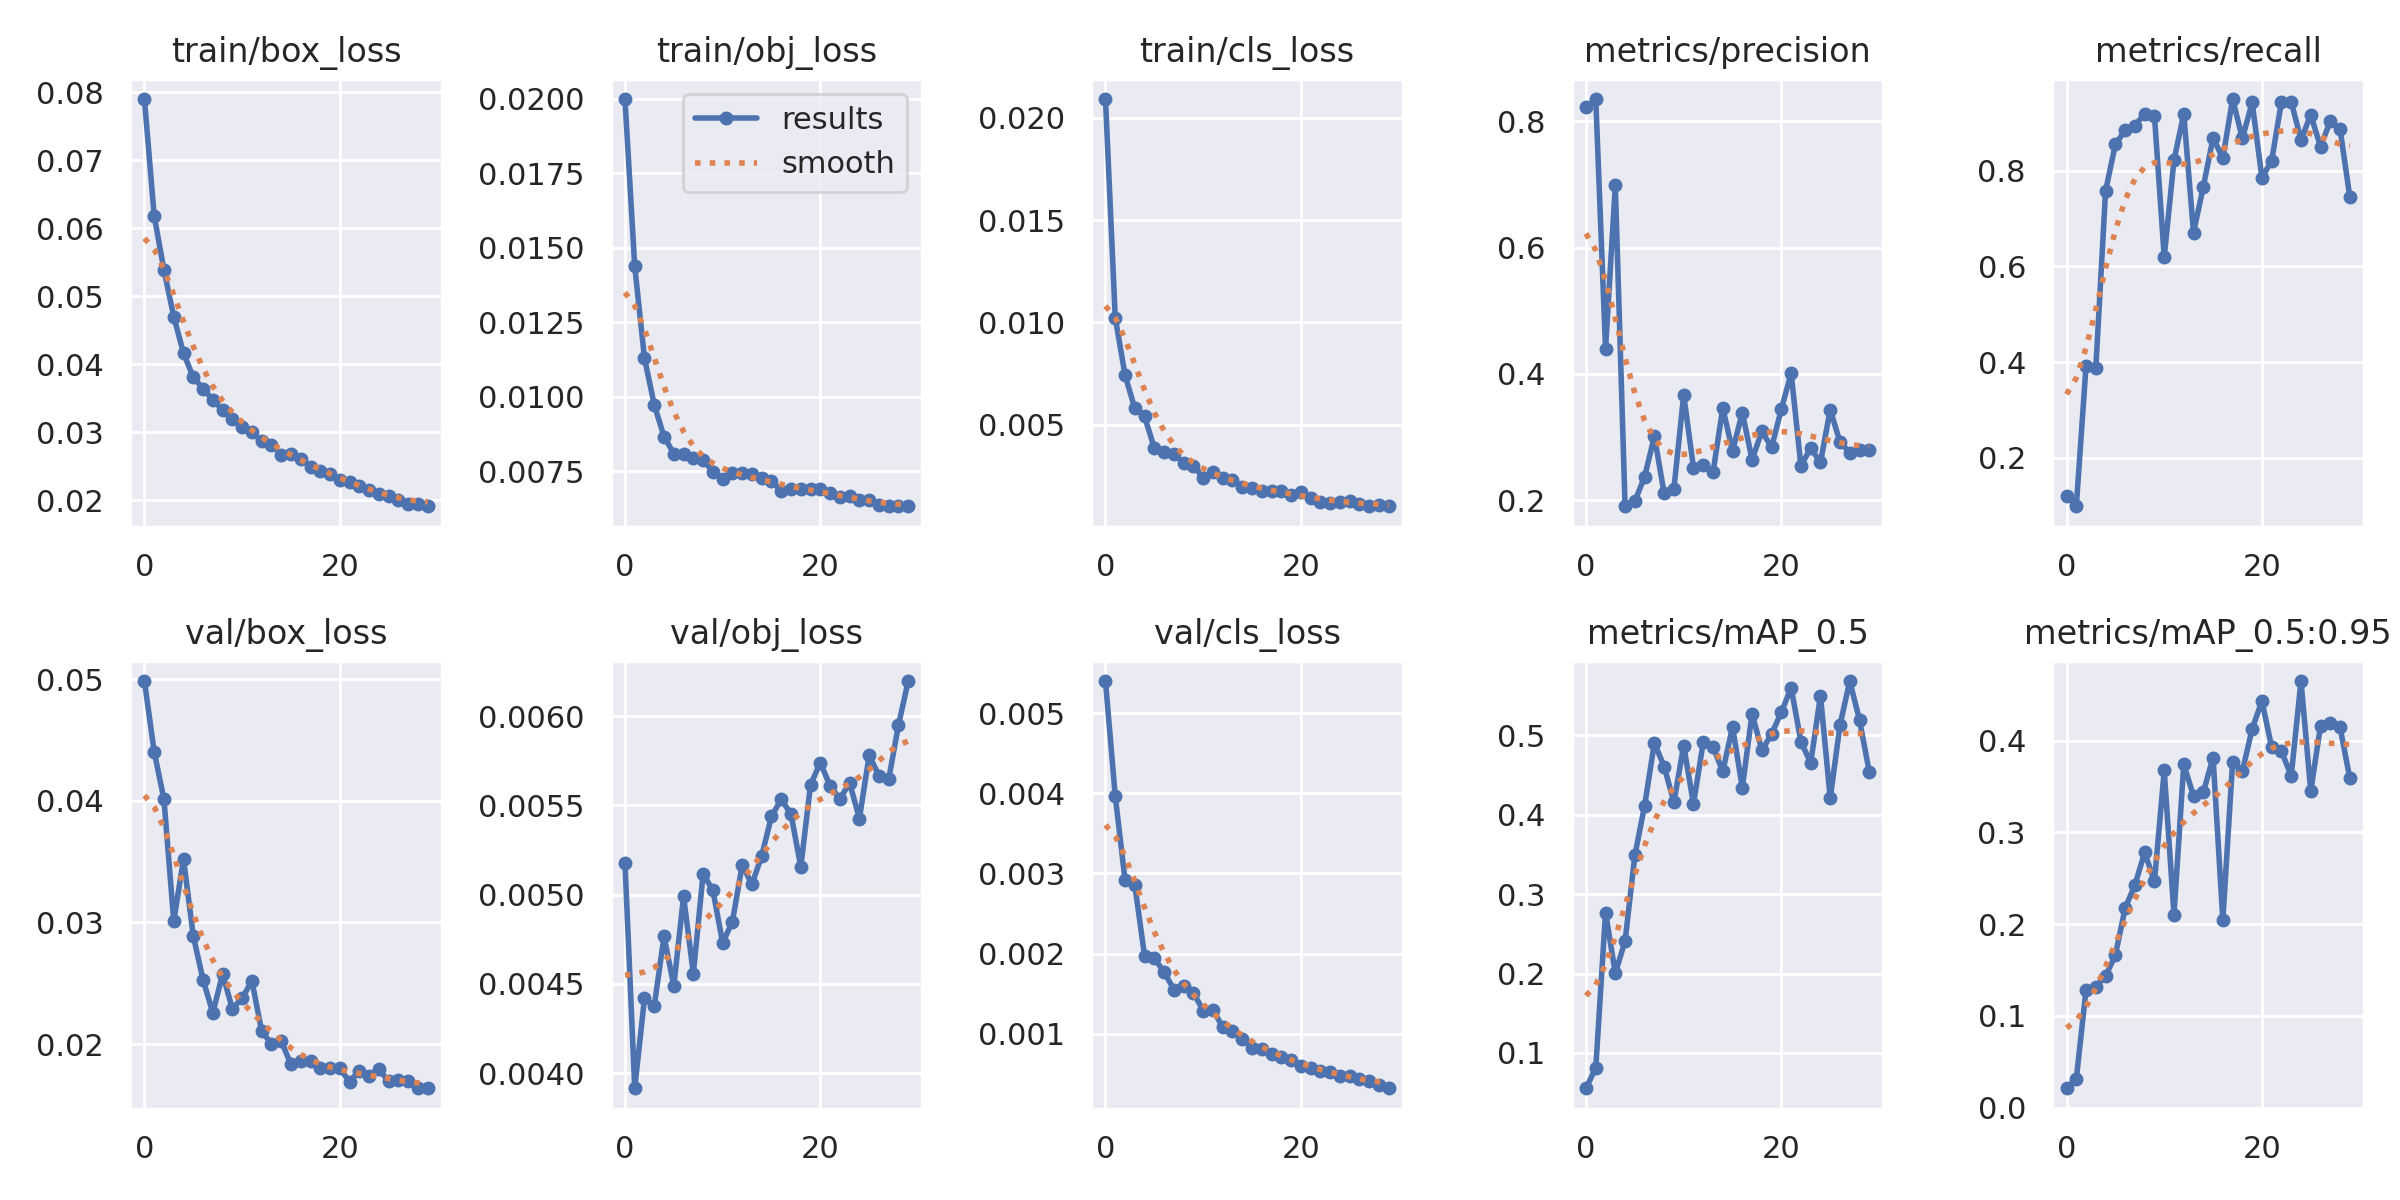

In [ ]:

import torch
from IPython.display import Image, clear_output
import yaml
print(f"Torch:{torch.__version__}\
({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Image(filename='/content/yolov5/runs/train/bic_results/results.png', width=800)

In [ ]:
!python val.py --weights runs/train/bic_results/weights/best.pt --data /content/yolov5/bic/data.yaml \
--img 640 --iou 0.65 --half

val: data=/content/yolov5/bic/data.yaml, weights=['runs/train/bic_results3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5x summary: 322 layers, 86200330 parameters, 0 gradients, 203.8 GFLOPs
val: Scanning /content/yolov5/bic/valid/labels.cache... 133 images, 475 backgrounds, 0 corrupt: 100% 608/608 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 19/19 [00:10<00:00,  1.83it/s]
                   all        608        153      0.271      0.934       0.55      0.468
                   BIC        608        139      0.218      0.957      0.251      0.191
 

In [ ]:
import torch
import cv2
from IPython.display import Image, clear_output

In [ ]:
%mkdir -p runs/detect/exp/labels


In [ ]:
!python detect.py --weights /content/front_best.pt --source /content/drive/MyDrive/예비프로젝트/front_1 --imgsz 640 --conf 0.4 --save-txt --exist-ok


detect: weights=['/content/front_best.pt'], source=/content/drive/MyDrive/예비프로젝트/front_1, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
custom_YOLOv5x summary: 212 layers, 20869098 parameters, 0 gradients, 47.9 GFLOPs
image 1/113 /content/drive/MyDrive/예비프로젝트/front_1/IMG_CON_CRANE_FRONT_A_20210814173038_037183.jpg: 384x640 1 BIC, 591.2ms
image 2/113 /content/drive/MyDrive/예비프로젝트/front_1/IMG_CON_CRANE_FRONT_A_20210814173322_237122.jpg: 384x640 1 BIC, 974.3ms
image 3/113 /content/drive/MyDrive/예비프로젝트/front_1/IMG_CON_CRANE_F

In [ ]:
%cp -r /content/yolov5/runs/detect/exp/labels /content/drive/MyDrive/예비프로젝트


In [ ]:
%cp /content/yolov5/runs/detect/exp/labels \
/content/drive/MyDrive/예비프로젝트

cp: -r not specified; omitting directory '/content/yolov5/runs/detect/exp/labels'


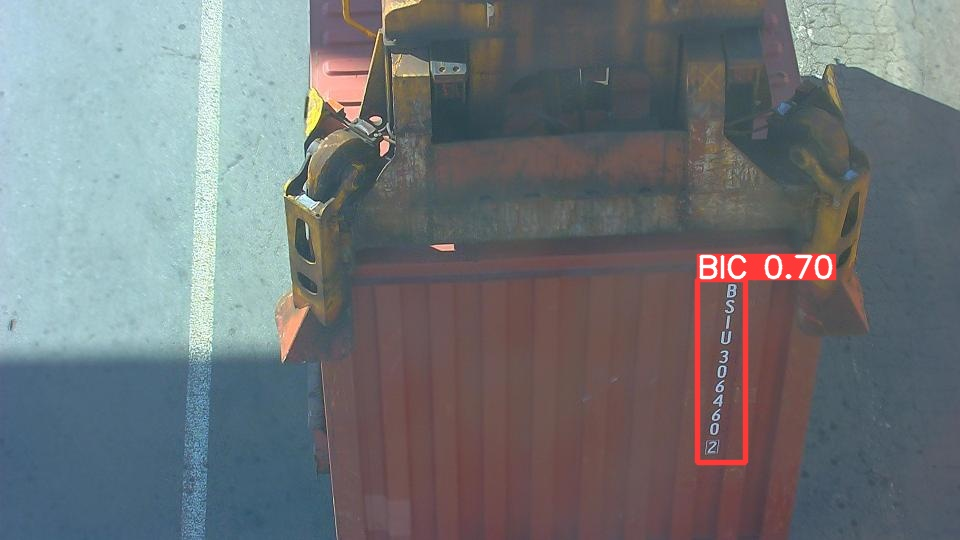

In [ ]:
import random
from glob import glob

image_name = random.choice(glob('/content/yolov5/runs/detect/exp/*jpg'))
Image(filename=image_name)

In [ ]:
import yaml

# data.yaml 파일 경로
data_yaml_path = '/content/yolov5/bic/data.yaml'

# data.yaml 파일 읽기
with open(data_yaml_path, 'r') as file:
    data = yaml.safe_load(file)

# 클래스 개수
num_classes = data['nc']

# 클래스 이름
class_names = data['names']

# 클래스 개수와 이름 출력
print("Number of Classes:", num_classes)
print("Class Names:", class_names)


Number of Classes: 5
Class Names: ['BIC', 'IMDG', 'REEFER', 'TANK', 'TYPESIZE']


In [ ]:
import os

# 검색할 폴더 경로 설정
folder_path = '/content/yolov5/runs/detect/exp'  # 실제 폴더 경로로 대체해주세요.

# 폴더 내의 .jpg 파일 개수 초기화
jpg_file_count = 0

# 폴더 내의 파일 목록 가져오기
file_list = os.listdir(folder_path)

# 파일 목록을 순회하며 .jpg 확장자를 가진 파일 개수 세기
for file in file_list:
    if file.endswith('.jpg'):
        jpg_file_count += 1

# .jpg 파일 개수 출력
print(f'{folder_path} 폴더 내의 .jpg 파일 개수: {jpg_file_count}')


/content/yolov5/runs/detect/exp 폴더 내의 .jpg 파일 개수: 608


In [ ]:
import os
import cv2

# 이미지가 있는 디렉토리 경로(디텍션할 때 사용한 이미지 경로)
image_dir = '/content/drive/MyDrive/예비프로젝트/front_1'
# 라벨 파일이 있는 디렉토리 경로
label_dir = '/content/yolov5/runs/detect/exp/labels'
# 결과를 저장할 디렉토리 경로
output_dir = '/content/yolov5/runs/detect/extracted_objects'

# 추출할 클래스 번호
target_class = 0

# 결과를 저장할 디렉토리 생성
os.makedirs(output_dir, exist_ok=True)

# 이미지 파일 목록을 가져옴
image_files = os.listdir(image_dir)

# 이미지 파일을 하나씩 처리
for image_file in image_files:
    # 이미지 파일 경로
    image_path = os.path.join(image_dir, image_file)

    # 라벨 파일 경로
    label_file = image_file.replace('.jpg', '.txt')
    label_path = os.path.join(label_dir, label_file)

    # 라벨 파일이 존재하는 경우에만 처리
    if os.path.isfile(label_path):
        # 라벨 파일을 열고 클래스 번호가 target_class인 객체를 추출
        with open(label_path, 'r') as label_file:
            lines = label_file.readlines()

        for line in lines:
            parts = line.strip().split()
            class_number = int(parts[0])

            if class_number == target_class:
                x_center = float(parts[1])
                y_center = float(parts[2])
                width = float(parts[3])
                height = float(parts[4])

                # 이미지 불러오기
                image = cv2.imread(image_path)

                # 객체의 좌표와 크기를 통해 객체 추출
                image_height, image_width, _ = image.shape
                x = int((x_center - width/2) * image_width)
                y = int((y_center - height/2) * image_height)
                w = int(width * image_width)
                h = int(height * image_height)

                # 이미지 크기를 좀 더 크게 조정
                #x -= w // 4
                #y -= h // 4
                #w += w // 2
                #h += h // 2

                # 추출한 객체 이미지 크기 조정 후 저장
                output_path = os.path.join(output_dir, f"{image_file.replace('.jpg', f'_{class_number}.jpg')}")
                object_image = image[y:y+h, x:x+w]
                cv2.imwrite(output_path, object_image)
    else:
        print(f"Label file not found for image: {image_file}")

print(f"Extraction completed. Objects are saved in {output_dir}")


Label file not found for image: IMG_CON_CRANE_FRONT_A_20210814213201_021210.jpg
Extraction completed. Objects are saved in /content/yolov5/runs/detect/extracted_objects


In [ ]:
import random
from glob import glob

In [ ]:
image_name = random.choice(glob('/content/yolov5/runs/detect/extracted_objects/*jpg'))
Image(filename=image_name)

In [ ]:
import os

# 검색할 폴더 경로 설정
folder_path = '/content/yolov5/runs/detect/extracted_objects'  # 실제 폴더 경로로 대체해주세요.

# 폴더 내의 .jpg 파일 개수 초기화
jpg_file_count = 0

# 폴더 내의 파일 목록 가져오기
file_list = os.listdir(folder_path)

# 파일 목록을 순회하며 .jpg 확장자를 가진 파일 개수 세기
for file in file_list:
    if file.endswith('.jpg'):
        jpg_file_count += 1

# .jpg 파일 개수 출력
print(f'{folder_path} 폴더 내의 .jpg 파일 개수: {jpg_file_count}')


/content/yolov5/runs/detect/extracted_objects 폴더 내의 .jpg 파일 개수: 608


In [ ]:
!pip install pytesseract

In [ ]:
!pip install pytesseract
!apt-get install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (24.9 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120875 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [ ]:
import pytesseract
from PIL import Image
import os
import re
import cv2
import numpy as np

# Tesseract OCR 실행 파일 경로 설정
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files/Tesseract-OCR/tesseract.exe'

# 이미지 파일이 있는 폴더 경로
folder_path = '/content/yolov5/runs/detect/extracted_objects'  # 폴더 경로를 적절하게 수정해주세요.

# 정규 표현식을 사용하여 숫자, 알파벳 대문자 및 대괄호 추출
pattern = r'[0-9A-Z]+'

# 폴더 내의 모든 파일에 대해 반복
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.JPG'):
        # 이미지 파일 경로 생성
        image_path = os.path.join(folder_path, filename)

        # 이미지 불러오기
        image = Image.open(image_path)

        # 이미지 확대 (예: 2배)
        width, height = image.size
        new_width = width * 2
        new_height = height * 2
        image = image.resize((new_width, new_height))

        # 이미지를 Gray 스케일로 변환
        image = image.convert('L')

        # 이미지에 가우시안 블러 적용 (블러 처리)
        image = cv2.GaussianBlur(np.array(image), (9,9), 3)
        image = Image.fromarray(image)


        # OCR 인식 실행 (LSTM 엔진 사용)
        result = pytesseract.image_to_string(image, lang='eng', config='--oem 1 --psm 6')

        # 추출된 텍스트에서 숫자, 알파벳 대문자 및 대괄호만 찾기
        extracted_text = re.findall(pattern, result)

        # 추출된 텍스트 출력
        recognized_text = ' '.join(extracted_text)
        print(f'파일: {filename}')
        print(f'인식된 텍스트:\n{recognized_text}')


TesseractNotFoundError: ignored